# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
science_study = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
science_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
# Checking the number of mice.
len(science_study["Mouse ID"].unique())

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse = science_study[science_study.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_comp = science_study[science_study["Mouse ID"].isin(duplicate_mouse) == False]
clean_data_comp

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_data_comp["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
means = clean_data_comp.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medians = clean_data_comp.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variances = clean_data_comp.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_devs = clean_data_comp.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems = clean_data_comp.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [10]:
summary_df = pd.DataFrame({
    "Mean Tumor Volume": means,
    "Median Tumor Volume": medians,
    "Tumor Volume Variance": variances,
    "Tumor Volume Std Dev": std_devs,
    "Tumor Volume SEM": sems
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df2 = clean_data_comp.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(Mean="mean",Median="median",Variance="var",Std_Dev="std",SEM="sem")
summary_df2

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

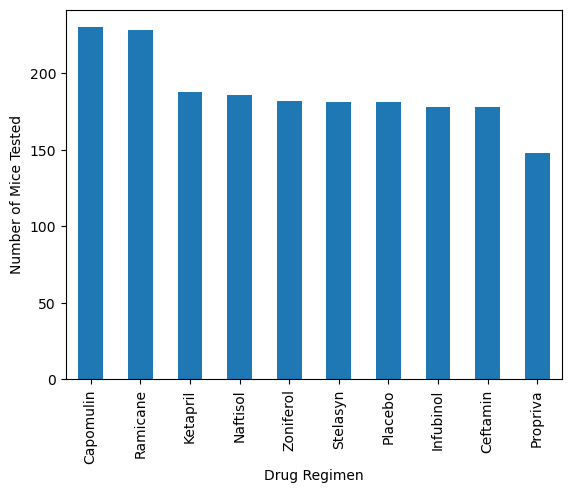

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = clean_data_comp["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

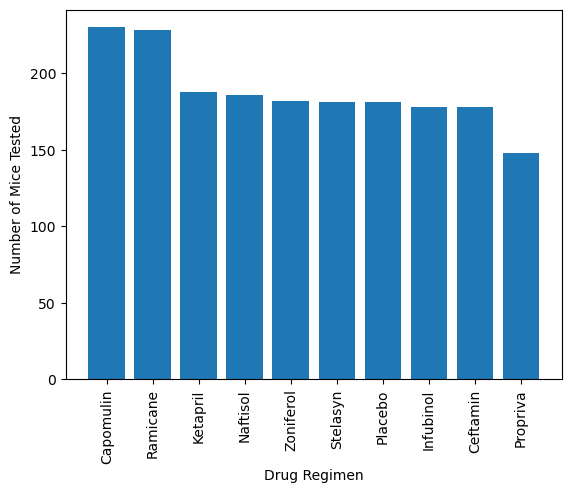

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = clean_data_comp["Drug Regimen"].value_counts()
plt.bar(counts.index.values, counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

<Axes: ylabel='count'>

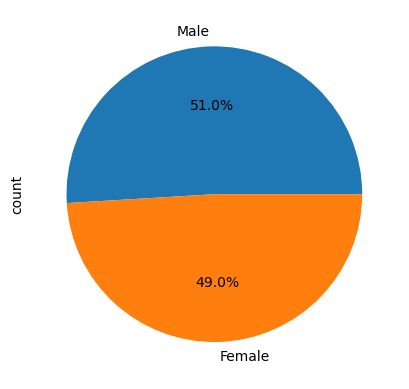

In [14]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

counts = clean_data_comp.Sex.value_counts()
# Make the pie chart
counts.plot(kind="pie", autopct="%1.1f%%")

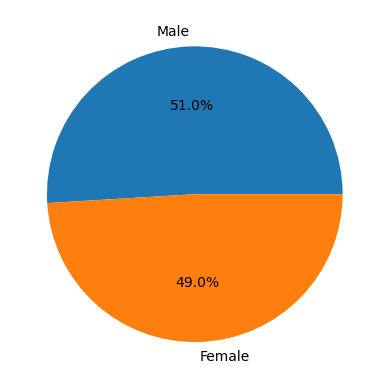

In [15]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
counts = clean_data_comp.Sex.value_counts()
plt.pie(counts.values, labels=counts.index.values, autopct="%1.1f%%")
# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_data_comp.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()
max_tumor
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(clean_data_comp, on= ["Mouse ID", "Timepoint"], how="left")
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    # add subset
    tumor_vol_list.append(final_tumor)

    # Determine outliers using upper and lower bounds
    quartiles = final_tumor.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq - (1.5 * iqr)

    outliers = final_tumor.loc[(final_tumor < lower_bound) | (final_tumor > upper_bound)]
    print(f"{drug}'s potential outliers {outliers}")
    


Capomulin's potential outliers 19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
124    33.329098
162    46.539206
163    32.377357
169    41.581521
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
239    31.896238
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers 6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
76     33.562402
77     36.374510
91     31.560470
93     36.134852
119    30.564625
126    31.095335
157    45.220869
158    36.561652
166    37.225650
168    43.419381
177    30.276232
190    40.667713
217    43.166373
235    44.183451
244    30.638696
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers 0      67.973419
1      65.525743
11     57.

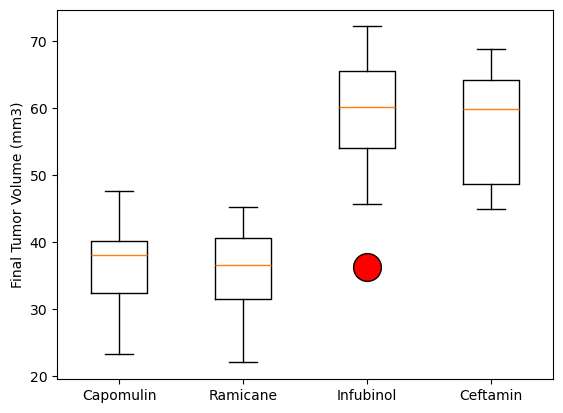

In [32]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor='red', markersize=20)
plt.boxplot(tumor_vol_list, labels = treatments_list, flierprops=orange_out)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse f966')

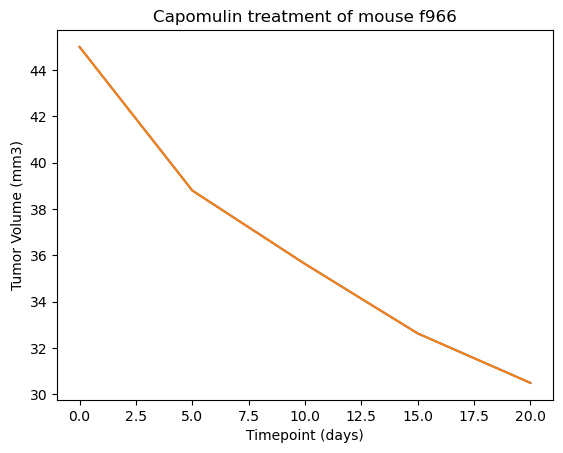

In [45]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df =clean_data_comp[clean_data_comp["Drug Regimen"] == "Capomulin"]
mousedata = capomulin_df[capomulin_df["Mouse ID"] == "f966"]
plt.plot(mousedata["Timepoint"], mousedata["Tumor Volume (mm3)"])

plt.plot(mousedata["Timepoint"], mousedata["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse f966")

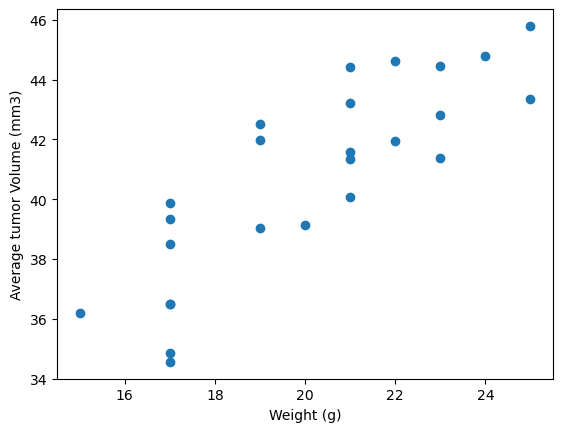

In [48]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = clean_data_comp[clean_data_comp["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin_table.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()

plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


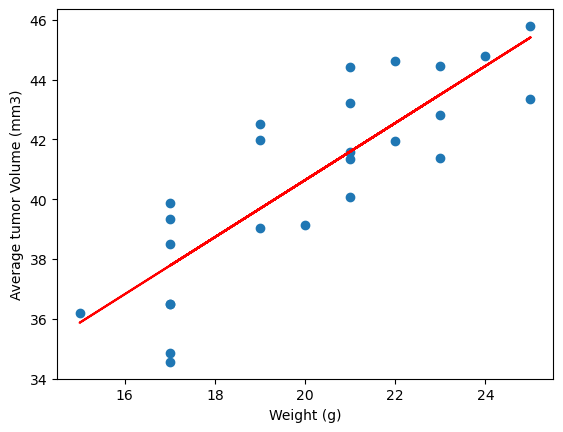

In [54]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = st.pearsonr(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(corr[0], 2)}")

model = st.linregress(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
slope = model[0]
b = model[1]
y_values = capomulin_average["Weight (g)"] * slope + b
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.plot(capomulin_average["Weight (g)"], y_values, color = "red")
plt.xlabel("Weight (g)")
plt.ylabel("Average tumor Volume (mm3)")
plt.show()